# Fitting Models Exercise 2

## Imports

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt

## Fitting a decaying oscillation

For this problem you are given a raw dataset in the file `decay_osc.npz`. This file contains three arrays:

* `tdata`: an array of time values
* `ydata`: an array of y values
* `dy`: the absolute uncertainties (standard deviations) in y

Your job is to fit the following model to this data:

$$ y(t) = A e^{-\lambda t} \cos{\omega t + \delta} $$

First, import the data using NumPy and make an appropriately styled error bar plot of the raw data.

In [3]:
f = np.load('decay_osc.npz', mmap_mode='r')

In [4]:
list(f)

['ydata', 'dy', 'tdata']

In [5]:
ydata = f['ydata']
dy = f['dy']
tdata = f['tdata']

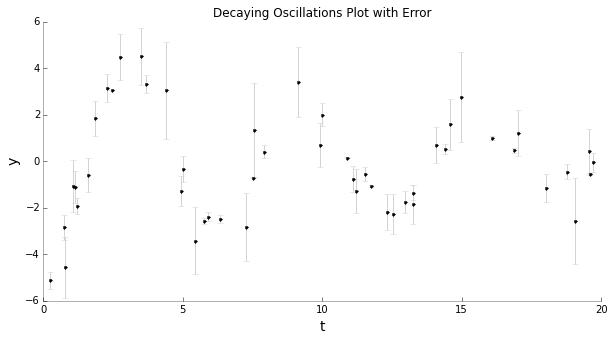

In [27]:
plt.figure(figsize=(10,5))
plt.errorbar(tdata, ydata, dy, fmt='.k', ecolor='lightgray')
plt.xlabel("t", fontsize=14)
plt.ylabel("y", fontsize=14)
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('#a2a7ff')
ax.spines['left'].set_color('#a2a7ff')
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
plt.title("Decaying Oscillations Plot with Error")
plt.show()

In [10]:
assert True # leave this to grade the data import and raw data plot

Now, using `curve_fit` to fit this model and determine the estimates and uncertainties for the parameters:

* Print the parameters estimates and uncertainties.
* Plot the raw and best fit model.
* You will likely have to pass an initial guess to `curve_fit` to get a good fit.
* Treat the uncertainties in $y$ as *absolute errors* by passing `absolute_sigma=True`. 

In [11]:
def model(t, A, lamb, omega, delta):
    return A*np.exp(-lamb*t)*np.cos(omega*t) + delta

In [12]:
theta_best, theta_cov = opt.curve_fit(model, tdata, ydata, sigma=dy)

In [13]:
print('A = {0:.3f} +/- {1:.3f}'.format(theta_best[0],np.sqrt(theta_cov[0,0])))
print('lambda = {0:.3f} +/- {1:.3f}'.format(theta_best[1],np.sqrt(theta_cov[1,1])))
print('omega = {0:.3f} +/- {1:.3f}'.format(theta_best[2],np.sqrt(theta_cov[2,2])))
print('delta = {0:.3f} +/- {1:.3f}'.format(theta_best[3],np.sqrt(theta_cov[3,3])))

A = -4.896 +/- 0.061
lambda = 0.094 +/- 0.003
omega = -1.001 +/- 0.001
delta = 0.027 +/- 0.014


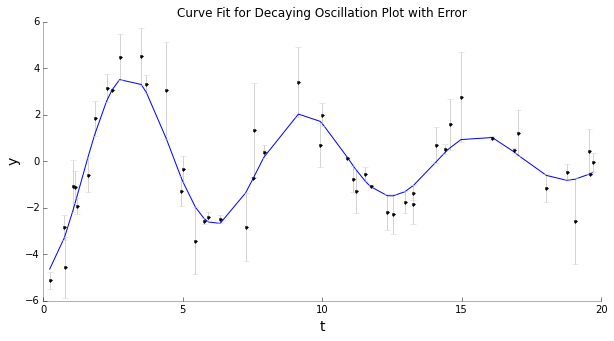

In [37]:
Y = theta_best[0]*np.exp(-theta_best[1]*tdata)*np.cos(theta_best[2]*tdata) + theta_best[3]
plt.figure(figsize=(10,5))
plt.plot(tdata,Y)
plt.errorbar(tdata, ydata, dy, fmt='.k', ecolor='lightgray')
plt.xlabel("t", fontsize=14)
plt.ylabel("y", fontsize=14)
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('#a2a7ff')
ax.spines['left'].set_color('#a2a7ff')
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
plt.title("Curve Fit for Decaying Oscillation Plot with Error")
plt.show()


In [ ]:
assert True # leave this cell for grading the fit; should include a plot and printout of the parameters+errors